# EDA for crypto currency Tron (TRX)

In [68]:
from requests import request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import os

load_dotenv()

API_KEY = os.getenv("COINMARKET_API")

API_URL1 = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

API_URL2 = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest"

target_symbol = "TRX"

parameters = {
  'symbol': target_symbol,
  'convert':'SEK'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(API_URL2, params=parameters)
  data = json.loads(response.text)
  #pprint(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

data

{'status': {'timestamp': '2025-02-13T09:23:04.374Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 41,
  'credit_count': 1,
  'notice': None},
 'data': {'TRX': {'id': 1958,
   'name': 'TRON',
   'symbol': 'TRX',
   'slug': 'tron',
   'num_market_pairs': 1118,
   'date_added': '2017-09-13T00:00:00.000Z',
   'tags': ['media',
    'payments',
    'ethereum-ecosystem',
    'tron-ecosystem',
    'layer-1',
    'dwf-labs-portfolio',
    'alleged-sec-securities',
    '2017-2018-alt-season',
    'tron20-ecosystem'],
   'max_supply': None,
   'circulating_supply': 86100775672.75667,
   'total_supply': 86100798704.42352,
   'is_active': 1,
   'infinite_supply': True,
   'platform': None,
   'cmc_rank': 10,
   'is_fiat': 0,
   'self_reported_circulating_supply': None,
   'self_reported_market_cap': None,
   'tvl_ratio': None,
   'last_updated': '2025-02-13T09:21:00.000Z',
   'quote': {'SEK': {'price': 2.609561818944382,
     'volume_24h': 7552556474.694676,
     'volume_change_24h': 22

In [69]:
data.keys()

dict_keys(['status', 'data'])

In [70]:
data["data"].keys()

dict_keys(['TRX'])

In [71]:
coind_data =data["data"]["TRX"]
coind_data

{'id': 1958,
 'name': 'TRON',
 'symbol': 'TRX',
 'slug': 'tron',
 'num_market_pairs': 1118,
 'date_added': '2017-09-13T00:00:00.000Z',
 'tags': ['media',
  'payments',
  'ethereum-ecosystem',
  'tron-ecosystem',
  'layer-1',
  'dwf-labs-portfolio',
  'alleged-sec-securities',
  '2017-2018-alt-season',
  'tron20-ecosystem'],
 'max_supply': None,
 'circulating_supply': 86100775672.75667,
 'total_supply': 86100798704.42352,
 'is_active': 1,
 'infinite_supply': True,
 'platform': None,
 'cmc_rank': 10,
 'is_fiat': 0,
 'self_reported_circulating_supply': None,
 'self_reported_market_cap': None,
 'tvl_ratio': None,
 'last_updated': '2025-02-13T09:21:00.000Z',
 'quote': {'SEK': {'price': 2.609561818944382,
   'volume_24h': 7552556474.694676,
   'volume_change_24h': 22.8956,
   'percent_change_1h': 0.1764811,
   'percent_change_24h': -0.26072044,
   'percent_change_7d': 5.64807851,
   'percent_change_30d': 7.39370215,
   'percent_change_60d': -14.11344095,
   'percent_change_90d': 32.69236929,

In [72]:
coind_data["name"], coind_data["symbol"], coind_data["quote"]

('TRON',
 'TRX',
 {'SEK': {'price': 2.609561818944382,
   'volume_24h': 7552556474.694676,
   'volume_change_24h': 22.8956,
   'percent_change_1h': 0.1764811,
   'percent_change_24h': -0.26072044,
   'percent_change_7d': 5.64807851,
   'percent_change_30d': 7.39370215,
   'percent_change_60d': -14.11344095,
   'percent_change_90d': 32.69236929,
   'market_cap': 224685296777.12106,
   'market_cap_dominance': 0.6506,
   'fully_diluted_market_cap': 224685356879.68228,
   'tvl': None,
   'last_updated': '2025-02-13T09:21:03.000Z'}})

In [73]:
quote = coind_data["quote"]["SEK"]
quote

{'price': 2.609561818944382,
 'volume_24h': 7552556474.694676,
 'volume_change_24h': 22.8956,
 'percent_change_1h': 0.1764811,
 'percent_change_24h': -0.26072044,
 'percent_change_7d': 5.64807851,
 'percent_change_30d': 7.39370215,
 'percent_change_60d': -14.11344095,
 'percent_change_90d': 32.69236929,
 'market_cap': 224685296777.12106,
 'market_cap_dominance': 0.6506,
 'fully_diluted_market_cap': 224685356879.68228,
 'tvl': None,
 'last_updated': '2025-02-13T09:21:03.000Z'}

In [74]:
# DataFrame analysis
tron = {
    "Name": coind_data["name"],
    "Symbol": coind_data["symbol"],
    "Slug": coind_data["slug"],
    "Date Added": coind_data["date_added"],
    "Circulating Supply": coind_data["circulating_supply"],
    "Total Supply": coind_data["total_supply"],
    "Max Supply": coind_data["max_supply"],
    "Market Cap": quote["market_cap"],
    "Volume 24h": quote["volume_24h"],
    "Price": quote["price"],
    "Percent Change 1h": quote["percent_change_1h"],
    "Percent Change 24h": quote["percent_change_24h"],
    "Percent Change 7d": quote["percent_change_7d"],
    "Percent Change 30d": quote["percent_change_30d"],
    "Percent Change 60d": quote["percent_change_60d"],
    "Percent Change 90d": quote["percent_change_90d"],
    "Last Updated": quote["last_updated"]
}

df = pd.DataFrame([tron])

df.head()

,Name,Symbol,Slug,Date Added,Circulating Supply,Total Supply,Max Supply,Market Cap,Volume 24h,Price,Percent Change 1h,Percent Change 24h,Percent Change 7d,Percent Change 30d,Percent Change 60d,Percent Change 90d,Last Updated
0,TRON,TRX,tron,2017-09-13T00:00:00.000Z,8.610078e+10,8.610080e+10,None,2.246853e+11,7.552556e+09,2.609562,0.176481,-0.26072,5.648079,7.393702,-14.113441,32.692369,2025-02-13T09:21:03.000Z


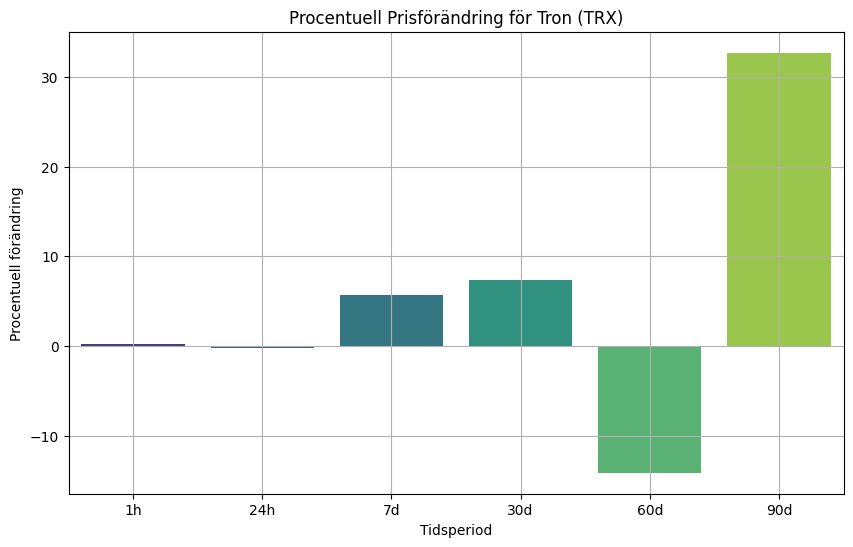

In [75]:
# Visualize price changes
plt.figure(figsize=(10, 6))
sns.barplot(x=["1h", "24h", "7d", "30d", "60d", "90d"], 
            y=[tron["Percent Change 1h"], tron["Percent Change 24h"], tron["Percent Change 7d"], 
               tron["Percent Change 30d"], tron["Percent Change 60d"], tron["Percent Change 90d"]],
            hue=["1h", "24h", "7d", "30d", "60d", "90d"], 
            palette="viridis", legend=False)
plt.title("Procentuell Prisförändring för Tron (TRX)")
plt.xlabel("Tidsperiod")
plt.ylabel("Procentuell förändring")
plt.grid(True)
plt.show()

## Convert to Nordic currencies

In [76]:
valutor = ['SEK', 'NOK', 'DKK', 'ISK']
resultat = {}
namn = ''
symbol = ''

for valuta in valutor:
    parameters = {
        'start': '1',
        'limit': '100',
        'convert': valuta
    }
    
    response = requests.get(API_URL1, headers=headers, params=parameters)
    data = response.json()
    
    if 'data' in data:
        for crypto in data['data']:
            if crypto['symbol'] == 'TRX':
                if not namn and not symbol:
                    namn = crypto['name']
                    symbol = crypto['symbol']
                
                resultat[valuta] = crypto['quote'][valuta]['price']
                break
    else:
        print("Fel vid hämtning av data:", data)

print(f"Namn: {namn}")
print(f"Symbol: {symbol}")
for valuta, pris in resultat.items():
    print(f"Pris i {valuta}: {pris:.2f} {valuta}")

Namn: TRON
Symbol: TRX
Pris i SEK: 2.61 SEK
Pris i NOK: 2.71 NOK
Pris i DKK: 1.72 DKK
Pris i ISK: 33.89 ISK
